https://priceisright.fandom.com/wiki/Showcase_Showdown

In [1]:
import os
import sys
import datetime
import numpy as np
import pickle
import pandas as pd
import datetime
import re
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv(r"FullContent.csv", parse_dates=['airDate'])
df.shape

(26791, 40)

In [17]:
sc_df = df.loc[~df.Total.isna()].copy()
sc_df.shape

(24864, 40)

In [3]:
df.head(3)

,url,episodeID,errorCode,footer,urlParam,EpsCategory,airDate,SC_ind,PrizeValue,Contestant,...,SpinOff2,SpinOff2Max,SpinOff2Match,SpinOff2MatchCnt,SpinOff3,SpinOff3Max,SpinOff3Match,SpinOff3MatchCnt,Bonus,Winner
0,https://tpirepguide.com/?p=18052,9782K,0,"March 29th, 2022 | Category: Carey Eps",18052,Carey Eps,2022-03-29,1.0,"1,340",Maurice,...,NaN,NaN,False,0.0,NaN,NaN,False,0.0,NaN,False
1,https://tpirepguide.com/?p=18052,9782K,0,"March 29th, 2022 | Category: Carey Eps",18052,Carey Eps,2022-03-29,2.0,"8,531",Kim,...,NaN,NaN,False,0.0,NaN,NaN,False,0.0,50.0,True
2,https://tpirepguide.com/?p=18052,9782K,0,"March 29th, 2022 | Category: Carey Eps",18052,Carey Eps,2022-03-29,3.0,"25,760",Sandra,...,NaN,NaN,False,0.0,NaN,NaN,False,0.0,NaN,False


### Showdowns Captured

In [6]:
year_sum = df.groupby(['urlParam', df.airDate.dt.year]).Contestant.count().reset_index()
year_sum['Found'] = (year_sum.Contestant > 0)
year_sum = year_sum.groupby(['airDate']).Found.agg(['count', 'sum']).reset_index()
year_sum = year_sum.rename(columns={'count': 'Episodes', 'sum': 'Captured'})
year_sum['RateFound'] = year_sum.Captured * 1.0 / year_sum.Episodes
year_sum.head(3)

,airDate,Episodes,Captured,RateFound
0,1972,84,0,0.0
1,1973,80,0,0.0
2,1974,30,0,0.0


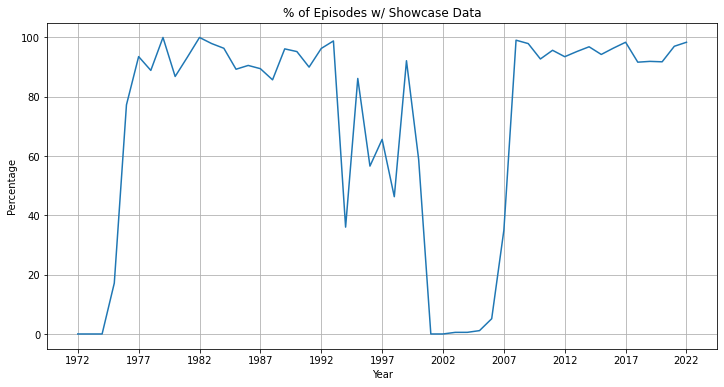

In [13]:
plt.figure(figsize=(12, 6))
plt.title("% of Episodes w/ Showcase Data")
plt.xlabel("Year")
plt.ylabel("Percentage")
plt.plot(year_sum.airDate, year_sum.RateFound * 100)
plt.xticks(range(year_sum.airDate.min(), year_sum.airDate.max()+3, 5))
plt.grid()

### Initial Totals

In [36]:
sc_df['Winner'] = sc_df.Winner.astype(bool)

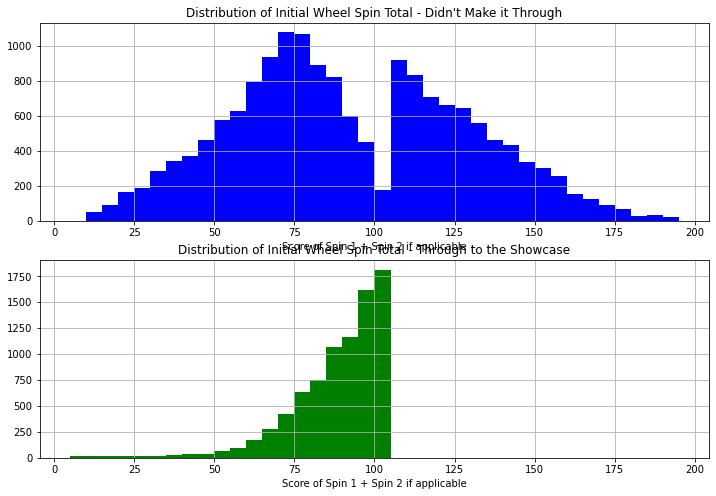

In [46]:
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("Distribution of Initial Wheel Spin Total - Didn't Make it Through")
plt.hist([sc_df.loc[~sc_df.Winner, :].Total], bins=range(5, 200, 5), color=['blue'])
plt.xlabel("Score of Spin 1 + Spin 2 if applicable")
plt.grid()
plt.subplot(2, 1, 2)
plt.title("Distribution of Initial Wheel Spin Total - Through to the Showcase")
plt.hist([sc_df.loc[sc_df.Winner, :].Total], bins=range(5, 200, 5), color=['green'])
plt.xlabel("Score of Spin 1 + Spin 2 if applicable")
plt.grid()
plt.show()

In [48]:
sc_df.columns

Index(['url', 'episodeID', 'errorCode', 'footer', 'urlParam', 'EpsCategory',
       'airDate', 'SC_ind', 'PrizeValue', 'Contestant', 'Spin1', 'Spin2',
       'Total', 'Comments', 'Showcase', 'ev1', 'ev2', 'ev3', 'ev4',
       'ContestantOrder', 'CommNums', 'Total_test', 'EndVal', 'EndValMax',
       'EndValMatch', 'EndValMatchCnt', 'SpinOff1', 'SpinOff1Max',
       'SpinOff1Match', 'SpinOff1MatchCnt', 'SpinOff2', 'SpinOff2Max',
       'SpinOff2Match', 'SpinOff2MatchCnt', 'SpinOff3', 'SpinOff3Max',
       'SpinOff3Match', 'SpinOff3MatchCnt', 'Bonus', 'Winner'],
      dtype='object')

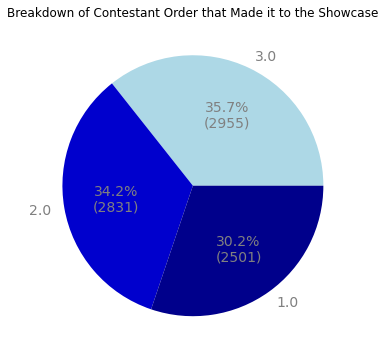

In [58]:
winner_order = sc_df.loc[sc_df.Winner].ContestantOrder.value_counts().reset_index()
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

plt.figure(figsize =(10, 6))
plt.title("Breakdown of Contestant Order that Made it to the Showcase")
wedges, texts, autotexts = plt.pie(winner_order.ContestantOrder, labels=winner_order['index'],
                                   colors=['lightblue', 'mediumblue', 'darkblue'],
                                   autopct = lambda pct: func(pct, winner_order.ContestantOrder),
                                  textprops = dict(color ="gray", size='14'))


### SpinOff Rates

In [15]:
df.SpinOff1.isna().value_counts(normalize=True)

True     0.925385
False    0.074615
Name: SpinOff1, dtype: float64